In [1]:
from one_bernoulli import BernoulliTesting
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_sample(n, p):
    return sps.bernoulli(p).rvs(n)

def get_hyp_prob_and_baeys(X, params):
    model = BernoulliTesting()
    model.fit(X)
    return model.aposterior_prob(*params)[0], model.bayes_factor(*params)

def draw(params):
    n_lim = 500
    step = 10
    p = 0.6
    ns = np.arange(step, n_lim, step)
    res = np.array([get_hyp_prob_and_baeys(gen_sample(n, p), params) for n in ns])

    plt.figure(figsize=(12, 6))
    plt.subplot('121')
    plt.plot(ns, res[:, 0])
    plt.subplot('122')
    plt.ylim(0, 100)
    plt.plot(ns, res[:, 1])

Проверка гипотезы типа Сложная vs. Сложная для выборки из распределение $Bern(p)$

$H_0: p > \theta$ vs $H_1: p < \theta$

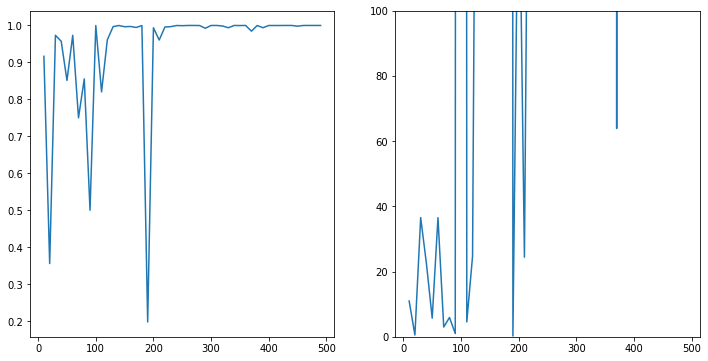

In [3]:
hypothesis = 'complex vs complex'
alternative = 'less'
aprior='Beta'
params = [0.5, [5, 5], hypothesis, alternative, aprior]
draw(params)

Проверка гипотезы типа Простая vs. Простая для выборки из распределение $Bern(p)$

$H_0: p = \theta_0$ vs $H_1: p = \theta_1$

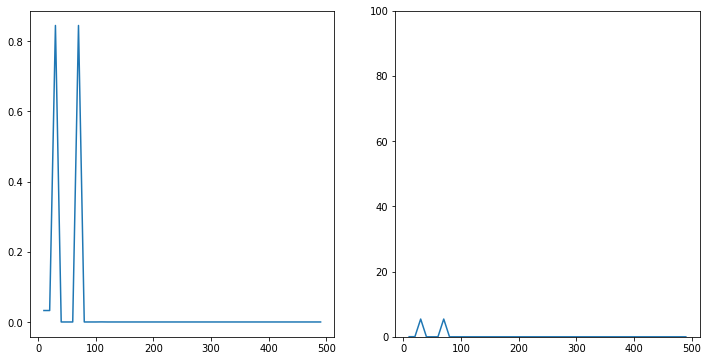

In [6]:
hypothesis = 'simple vs simple'
alternative = 'less'
aprior='Bernoulli'
params = [[0.3, 0.7], 0.5, hypothesis, alternative, aprior]

draw(params)

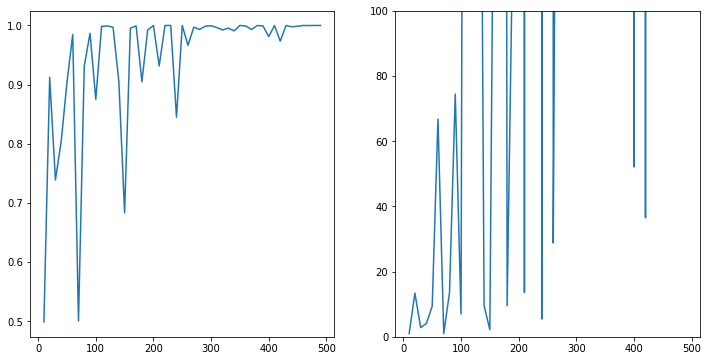

In [5]:
hypothesis = 'H_0 modification'
alternative = 'less'
aprior='Beta'
params = [0.5, [5, 5, 0.3], hypothesis, alternative, aprior]
draw(params)